
Machine Learning
Dr.Marco Aceves
Maestria en Ciencias en Inteligencia Artificial

Lic. Antonio Garcia Gutierrez
antonigarga34@gmail.com
Expediente: 261724

@author: Antonio Garcia Gutierrez


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
url = 'https://drive.google.com/file/d/1uMnAa1RC59ttwhbCyXLA7iWbAdq-NZdy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


# NORMALIZACIÓN E IMPUTACIÓN


In [57]:
por_imputar = df.isnull().sum()
por_imputar

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [58]:
def normOrdinario(dataframe,attr):
  categorias=dataframe[attr].unique()
  diccionario = {}
  index = 1
  for i in categorias:
    diccionario[i] = index
    index +=1
  dataframe[attr].replace(to_replace=diccionario, inplace=True)
  return

normOrdinario(df,'stock')

Convertir la fecha a valores numericos

In [59]:
df['date_parsed'] = pd.to_datetime(df['date'],format="%m/%d/%Y")
df['day_of_month'] = (df['date_parsed'].dt.day).astype(int)
df['month_of_year'] = (df['date_parsed'].dt.month).astype(int)
df['year'] = (df['date_parsed'].dt.year).astype(int)

In [60]:
#Eliminar los caracteres especiales
df.drop(['date','date_parsed'],inplace=True,axis=1)
columnas = ['open', 'high', 'low','close','next_weeks_open','next_weeks_close']
for i in columnas:
    df[i]=df[i].str.replace(r"\W","")

C:\Users\garci\AppData\Local\Temp\ipykernel_4692\296992017.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[i]=df[i].str.replace(r"\W","")


Imputación y comparación entre datos imputados y no imputados

C:\Users\garci\AppData\Local\Temp\ipykernel_4692\124054944.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:]=imputer.fit_transform(df)


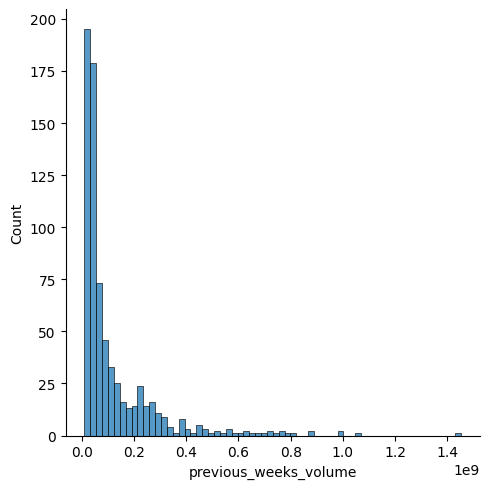

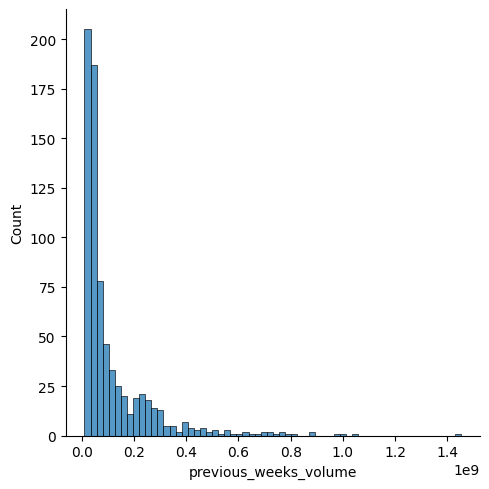

In [61]:
from sklearn.impute import KNNImputer
dfNoImp = df.copy()
imputer=KNNImputer(n_neighbors=5 , weights="uniform",metric="nan_euclidean")
df.iloc[:,:]=imputer.fit_transform(df)
sns.displot(dfNoImp['previous_weeks_volume'])
sns.displot(df['previous_weeks_volume'])



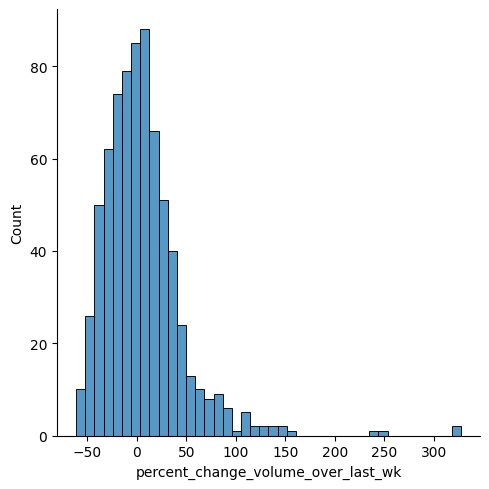

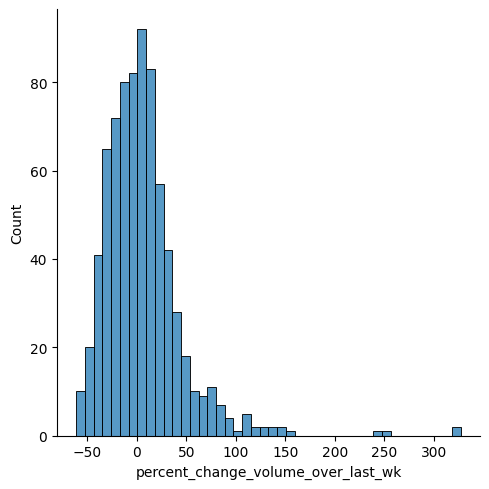

In [62]:
sns.displot(dfNoImp['percent_change_volume_over_last_wk'])
sns.displot(df['percent_change_volume_over_last_wk'])

In [63]:
print(df.isnull().sum())

quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
day_of_month                          0
month_of_year                         0
year                                  0
dtype: int64


In [64]:
#Mismo tipos de datos
for i in df:
    df[i] = df[i].astype('float64')
df.dtypes

quarter                               float64
stock                                 float64
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                float64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
days_to_next_dividend                 float64
percent_return_next_dividend          float64
day_of_month                          float64
month_of_year                         float64
year                                  float64
dtype: object

In [65]:
df[df.columns.values].corr()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,day_of_month,month_of_year,year
quarter,1.000000e+00,-9.382418e-16,0.025883,0.024727,0.024730,0.022102,-0.047599,-0.080959,0.021993,-0.062564,0.021018,0.019103,-0.017460,-0.025641,-0.008505,-3.448959e-02,8.712450e-01,NaN
stock,-9.382418e-16,1.000000e+00,0.071465,0.068538,0.075523,0.071119,-0.207636,0.031927,-0.016504,-0.204628,0.070765,0.070507,0.034043,-0.131439,0.531933,4.560541e-16,-7.914438e-16,NaN
open,2.588302e-02,7.146530e-02,1.000000,0.999607,0.999344,0.999044,-0.513424,0.061485,-0.014593,-0.515962,0.998942,0.997787,0.066603,-0.065228,-0.146001,-4.035707e-03,2.470117e-02,NaN
high,2.472680e-02,6.853768e-02,0.999607,1.000000,0.999419,0.999558,-0.512240,0.078656,-0.012570,-0.515382,0.999480,0.998500,0.069474,-0.065516,-0.148343,4.898883e-04,2.193412e-02,NaN
low,2.472986e-02,7.552279e-02,0.999344,0.999419,1.000000,0.999549,-0.514850,0.083170,-0.023314,-0.515486,0.999430,0.998326,0.067320,-0.066270,-0.143838,-7.005592e-05,2.022522e-02,NaN
close,2.210224e-02,7.111888e-02,0.999044,0.999558,0.999549,1.000000,-0.514545,0.097980,-0.022245,-0.515294,0.999916,0.998854,0.067664,-0.065975,-0.146417,2.617009e-03,1.643660e-02,NaN
volume,-4.759850e-02,-2.076363e-01,-0.513424,-0.512240,-0.514850,-0.514545,1.000000,-0.138924,0.194621,0.879712,-0.514324,-0.513456,-0.056389,-0.055486,-0.269735,-5.601939e-03,-4.257039e-02,NaN
percent_change_price,-8.095927e-02,3.192713e-02,0.061485,0.078656,0.083170,0.097980,-0.138924,1.000000,-0.222260,-0.053282,0.098270,0.099243,0.019955,0.006217,0.029925,1.263367e-01,-1.869667e-01,NaN
percent_change_volume_over_last_wk,2.199297e-02,-1.650410e-02,-0.014593,-0.012570,-0.023314,-0.022245,0.194621,-0.222260,1.000000,-0.114595,-0.021160,-0.021293,0.020932,-0.031192,-0.022362,1.039364e-01,6.332679e-03,NaN
previous_weeks_volume,-6.256364e-02,-2.046275e-01,-0.515962,-0.515382,-0.515486,-0.515294,0.879712,-0.053282,-0.114595,1.000000,-0.515274,-0.514870,-0.088332,-0.048573,-0.265182,-4.278308e-03,-5.667015e-02,NaN


<AxesSubplot: >

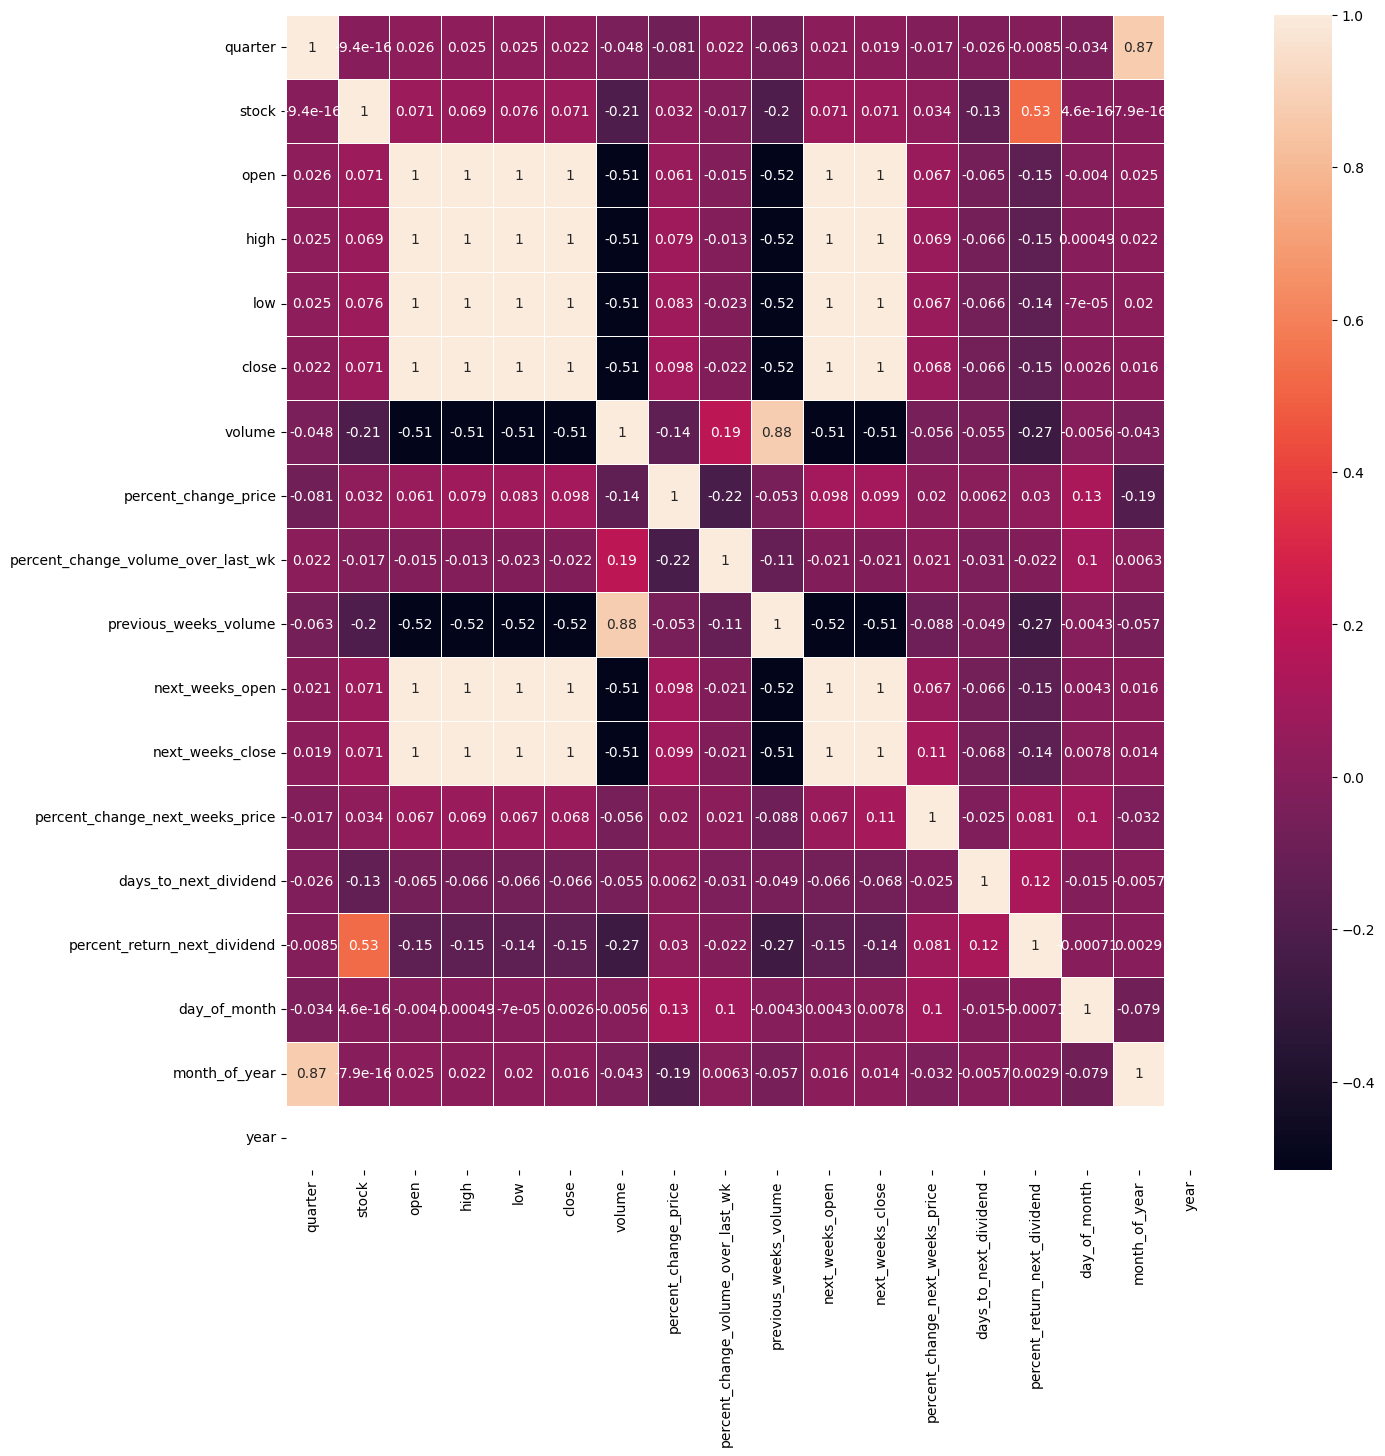

In [66]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df[df.columns.values].corr(), annot=True, linewidths=.5)

# METRICAS POR APLICAR


In [67]:
def mean_squared_error(y, y_pred):
  return (1 / len(y)) * np.sum(pow(np(y - y_pred),2))

def mean_absolute_error(y, y_pred):
    return (1 / len(y)) * np.sum(np.abs(y - y_pred))

def relative_squared_error(y, y_pred):
  y_mean = np.mean(y)
  squared_error_num = np.sum(np.square(y - y_pred))
  squared_error_den = np.sum(np.square(y - y_mean))
  rse_loss = squared_error_num / squared_error_den
  return rse_loss

def relative_absolute_error(y, y_pred):
  y_mean = np.mean(y)
  squared_error_num = np.sum(np.abs(y - y_pred))
  squared_error_den = np.sum(np.abs(y - y_mean))
  rae_loss = squared_error_num / squared_error_den
  return rae_loss

def R2_score(y, y_pred):
  rss_adj = np.sum((y - y_pred)**2)
  n = len(y)
  y_bar_adj = (1 / n) * np.sum(y)
  ess_adj = np.sum((y - y_bar_adj)**2)
  return 1 - rss_adj / ess_adj

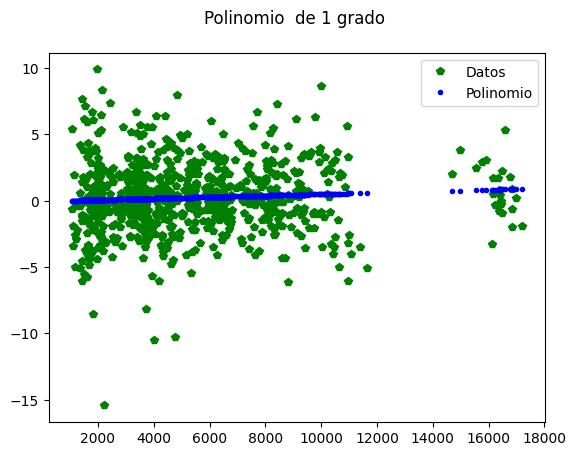

Mean Absolute Error(MAE)
2.0034407420593534
Relative Squared Error(RSE)
0.9955401364358066
Relative Absolute Error(RAE)
0.9957794047973817
R2_score
0.004459863564193367


In [68]:
x = df['next_weeks_open'].values
y = df['percent_change_next_weeks_price'].values
grado = 1
#Recibe x , y y el grado
f=np.poly1d(np.polyfit(x,y,grado))
plt.plot(x,y,'gp')
plt.plot(x,f(x),'b.')
plt.title("Polinomio  de "+ str(grado) + " grado \n")
plt.legend(['Datos','Polinomio'])
plt.show()

m = np.poly1d(np.polyfit(x, y, grado))
print("Mean Absolute Error(MAE)")
print(mean_absolute_error(y, m(x)))
print("Relative Squared Error(RSE)")
print(relative_squared_error(y, m(x)))
print("Relative Absolute Error(RAE)")
print(relative_absolute_error(y, m(x)))
print("R2_score")
print(R2_score(y, m(x)))

